# Case study "Weaver" - analiza wrazliwości na zmianę czynników #

### potrzebne paczki ###

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import triang
import matplotlib.pyplot as plt
from importlib import reload
from Weaver_analiza_wrazliwosci import simulate_scenario, optimise, analiza_wrazliwosci
import Weaver_analiza_wrazliwosci as aw
import pandas as pd
import seaborn as sns

In [ ]:
reload(aw)

<module 'Weaver_szkic' from '/Users/luiza/Desktop/projekty/swak/Weaver_szkic.py'>

## Analiza wrazliwosci na zmianę czynników stałych ##

### 1. Analiza    wrazliwości   wyniku   na   zmianę   ceny   za   sztukę ###

In [ ]:
SA_cena_za_sztuke= aw.analiza_wrazliwosci(aw.cena_jednostkowa, aw.cena_jednostkowa)
SA_cena_za_sztuke = pd.DataFrame(SA_cena_za_sztuke)
SA_cena_za_sztuke.head()

,zmienna,wartosc_gotowka
0,112,147386.080884
1,113,145211.088489
2,114,146851.058005
3,115,143113.735613
4,116,147084.815400


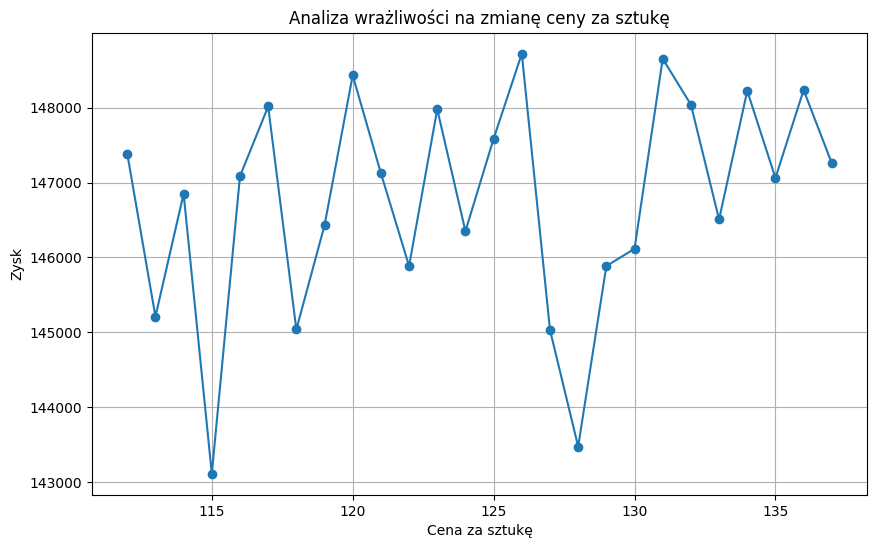

In [35]:
#wykres analizy wrazliwosci na zmiane ceny za sztuke

plt.figure(figsize=(10, 6))
plt.plot(SA_cena_za_sztuke['zmienna'], SA_cena_za_sztuke['wartosc_gotowka'], marker='o', linestyle='-')
plt.title('Analiza wrażliwości na zmianę ceny za sztukę')
plt.xlabel('Cena za sztukę')
plt.ylabel('Zysk')
plt.grid()
#plt.axhline(0, color='red', linestyle='--', label='Zysk = 0')
#plt.legend()
plt.show()

Wnioski: Najnizszy poziom gotówki w kasie pod koniec sierpnia otrzymamy przy cenie 115$ za sztukę, a najwyzszy przy ustalonej cenie 125 $ za sztuke. 

In [ ]:
SA_place = aw.analiza_wrazliwosci(aw.stawka_plac, aw.stawka_plac)

In [6]:
SA_place = pd.DataFrame(SA_place)
SA_place.head()

,zmienna,wartosc_gotowka
0,10,146522.755247
1,11,148562.404680
2,12,145776.060677
3,13,145437.241739
4,14,147794.502723


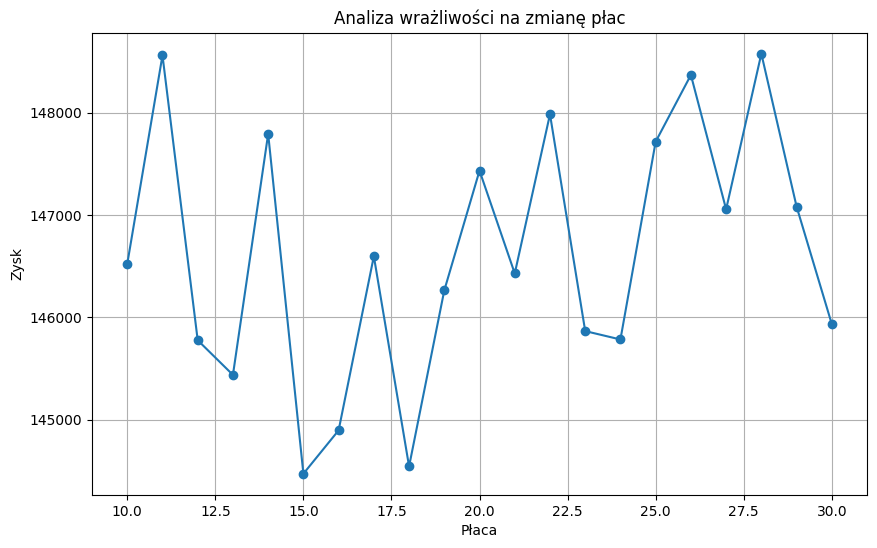

In [7]:
#wykres analizy wrazliwosci na zmiane płac

plt.figure(figsize=(10, 6))
plt.plot(SA_place['zmienna'], SA_place['wartosc_gotowka'], marker='o', linestyle='-')
plt.title('Analiza wrażliwości na zmianę płac')
plt.xlabel('Płaca')
plt.ylabel('Zysk')
plt.grid()
#plt.axhline(0, color='red', linestyle='--', label='Zysk = 0')
#plt.legend()
plt.show()

Wnioski: Co ciekawe, nizsze place wcale nie oznaczają wyzszego zysku. Najwyzszy zysk odnotujemy przy płacy 27.5$ , a takze przy placy rownej 10 $. Nie widać jednoznacznego trendu, zysk waha się w zaleznosci od płac w przedziale 144000-149000.


In [ ]:
#analiza wrazliwosci na zmianę ceny materiału za kilogram
SA_material = aw.analiza_wrazliwosci(aw.cena_materialu_kg, aw.cena_materialu_kg)
SA_material = pd.DataFrame(SA_material)
SA_material.head()

,zmienna,wartosc_gotowka
0,1,148006.018321
1,2,148033.440889
2,3,146861.311089
3,4,144895.821132
4,5,147489.180034


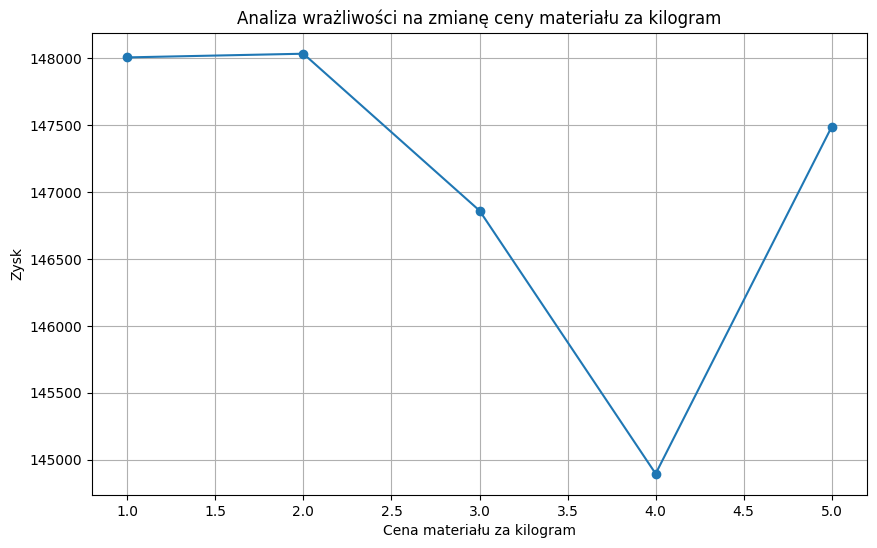

In [17]:
#wykres analizy wrazliwosci na zmiane ceny materiału za kilogram
plt.figure(figsize=(10, 6))
plt.plot(SA_material['zmienna'], SA_material['wartosc_gotowka'], marker='o', linestyle='-')
plt.title('Analiza wrażliwości na zmianę ceny materiału za kilogram')
plt.xlabel('Cena materiału za kilogram')
plt.ylabel('Zysk')
plt.grid()
#plt.axhline(0, color='red', linestyle='--', label='Zysk = 0')
#plt.legend()
plt.show()

Wnioski: na wykresie widać bardzo ciekawy trend. Najwyzszy zysk mozna zaobserwowac przy cenie jednostkowej 2 $/kg.
 Po przekroczeniu tej ceny wartość oczekiwana gotówki na koniec sierpnia zaczyna gwałtownie spadać, 
i jest najnizsza przy cenie za kg 4.0$, po czym znowu systematycznie rośnie. 

In [ ]:
#analiza wrazliwości na poziom stopy procentowej
wartosci = []
for aw.mies_st_proc in np.arange(0, 0.2 , 0.01):#zmiana co 1% w zakresie 0-20% 
        # Przeprowadzamy optymalizację dla zmiennej
        wart_oczekiw_gotowka = optimise()
        # Store the result (e.g., expected cash flow)
        wartosci.append({
            'stopa': aw.mies_st_proc,  # Stopa procentowa
            'wartosc_gotowka': float(wart_oczekiw_gotowka)  # Oczekiwana gotówka na koniec sierpnia
        })
    
#konwertujemy do DataFrame
SA_stopa = pd.DataFrame(wartosci)
SA_stopa.head()

,stopa,wartosc_gotowka
0,0.00,213574.136693
1,0.01,205320.459722
2,0.02,198935.197120
3,0.03,189536.909210
4,0.04,184958.651338


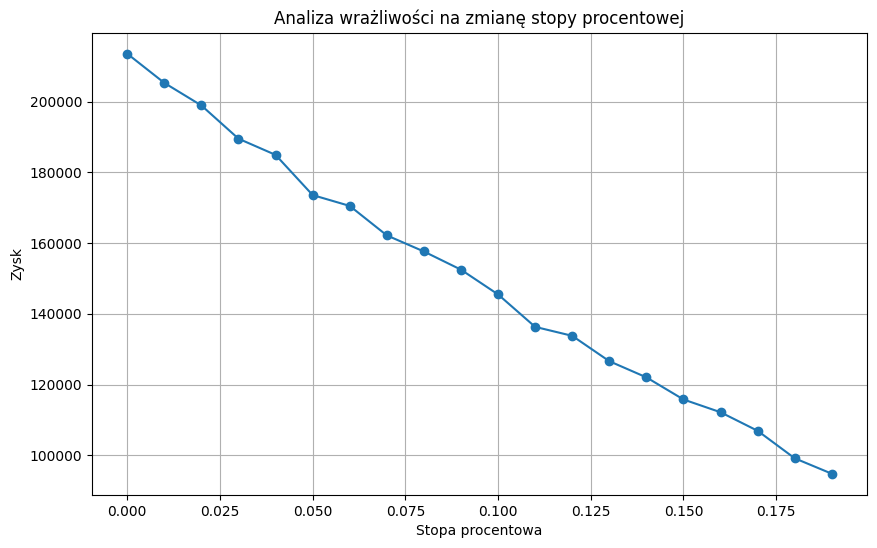

In [25]:
#wykres analizy wrazliwosci na zmiane stopy procentowej
plt.figure(figsize=(10, 6))
plt.plot(SA_stopa['stopa'], SA_stopa['wartosc_gotowka'], marker='o', linestyle='-')
plt.title('Analiza wrażliwości na zmianę stopy procentowej')
plt.xlabel('Stopa procentowa')
plt.ylabel('Zysk')
plt.grid()
plt.show()


Na wykresie obserwujemy bardzo wyrazny trend spadkowy - im wyzsza stopa procentowa, tym naturalnie większe raty kredytu musimy spłacać, i mniej gotówki zostaje w kasie.
Wpływ tej wysokosci stopy na ilość gotówki jest znaczny - zmiana poziomu stopy z 0 do 20% zmniejsza ilość gotówki w kasie az o połowę. 

## Analiza wrazliwosci - zmienne o rozkladzie trojkatnym ##

Proces analizy wrazliwosci wyniku na zmiane wartosci zmiennej o rozkladzie trojkatnym:
1. Definiujemy rozklad
2. Losujemy wartosci z rozkladu
3. Analizujemy relację między czasem produkcji a zyskiem.

In [ ]:

SA_czas_produkcji = aw.analiza_wrazliwosci_triangle(aw.czas_prod_rozk, 8.4, 15 , 36.6) #wartości z treści case study

In [51]:
SA_czas_produkcji.head()
SA_czas_produkcji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample_value  300 non-null    float64
 1   cash_flow     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


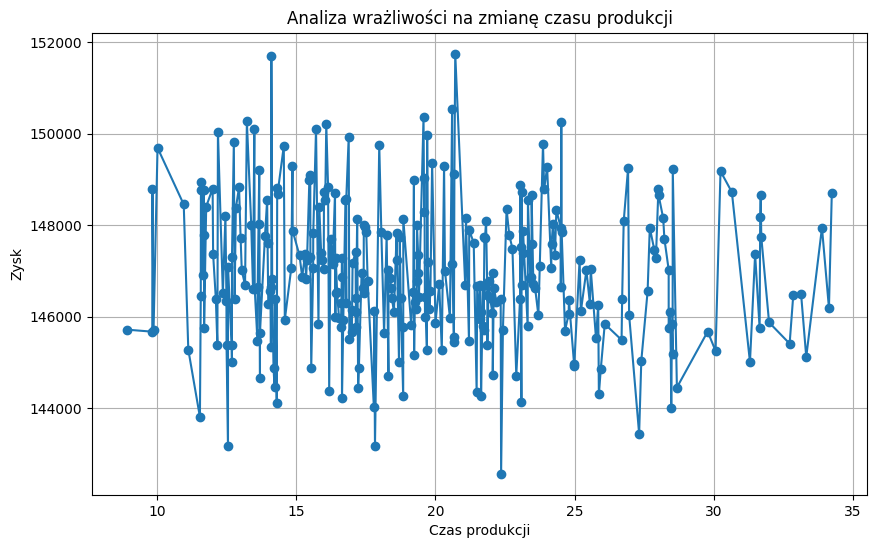

In [52]:
SA_czas_produkcji.sort_values(by='sample_value', ascending=True, inplace=True)
#visualise
plt.figure(figsize=(10, 6))
plt.plot(SA_czas_produkcji['sample_value'], SA_czas_produkcji['cash_flow'], marker='o', linestyle='-')
plt.title('Analiza wrażliwości na zmianę czasu produkcji')
plt.xlabel('Czas produkcji')
plt.ylabel('Zysk')
plt.grid()
plt.show()

Na wykresie nie widać wyraźnego trendu.

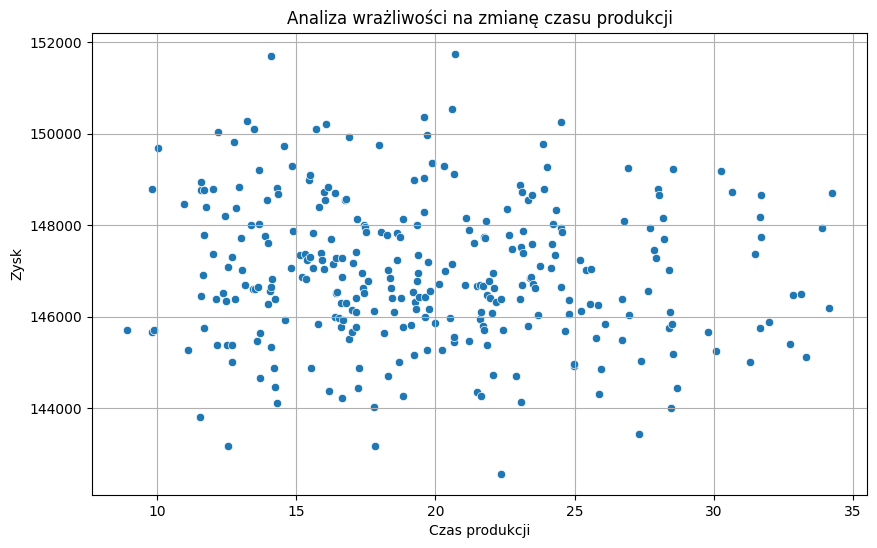

In [53]:

# Example DataFrame: df_results with 'sample_value' and 'cash_flow'
plt.figure(figsize=(10, 6))
sns.scatterplot( x= SA_czas_produkcji['sample_value'], y=SA_czas_produkcji['cash_flow'])
plt.title('Analiza wrażliwości na zmianę czasu produkcji')
plt.xlabel('Czas produkcji')
plt.ylabel('Zysk')
plt.grid()
plt.show()

Zmiana czasu produkcji nie wpływa jednoznacznie na końcowy stan gotówki w sierpniu. 